In [1]:
import pbjam as pb
from pbjam.asy_peakbag import asymptotic_fit
import lightkurve as lk
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

In [2]:
kic = '4448777'
numax = [220.0, 3.0]
dnu = [16.97, 0.01]
teff = [4750, 100]

In [3]:
lc = lk.search_lightcurvefile(kic, quarter=5).download().PDCSAP_FLUX

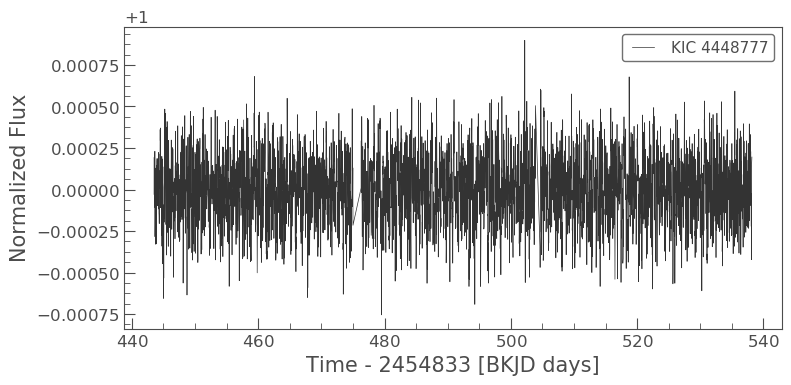

In [4]:
lc = lc.remove_nans().normalize().flatten().remove_outliers()
lc.plot()

/home/nielsemb/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:721: LightkurveWarning: `min_frequency` keyword is deprecated, please use `minimum_frequency` instead.
  LightkurveWarning)
/home/nielsemb/anaconda3/lib/python3.7/site-packages/lightkurve/periodogram.py:726: LightkurveWarning: `max_frequency` keyword is deprecated, please use `maximum_frequency` instead.
  LightkurveWarning)


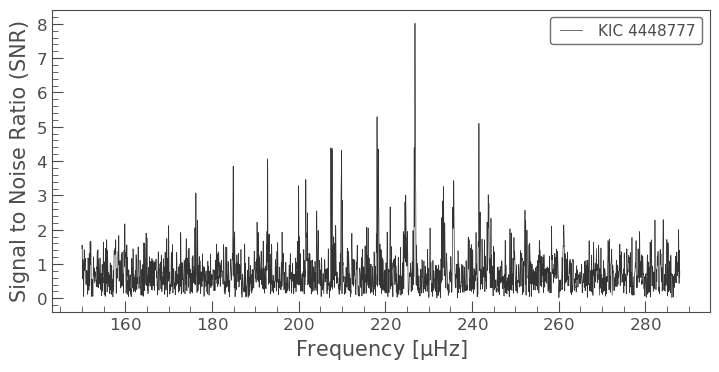

In [5]:
p = lc.to_periodogram(freq_unit=u.microHertz, max_frequency=288, min_frequency=150).flatten()
p.plot()

Epsilon from Vrard : (1.3781589243447712, 0.1)
Burningham
Sampling


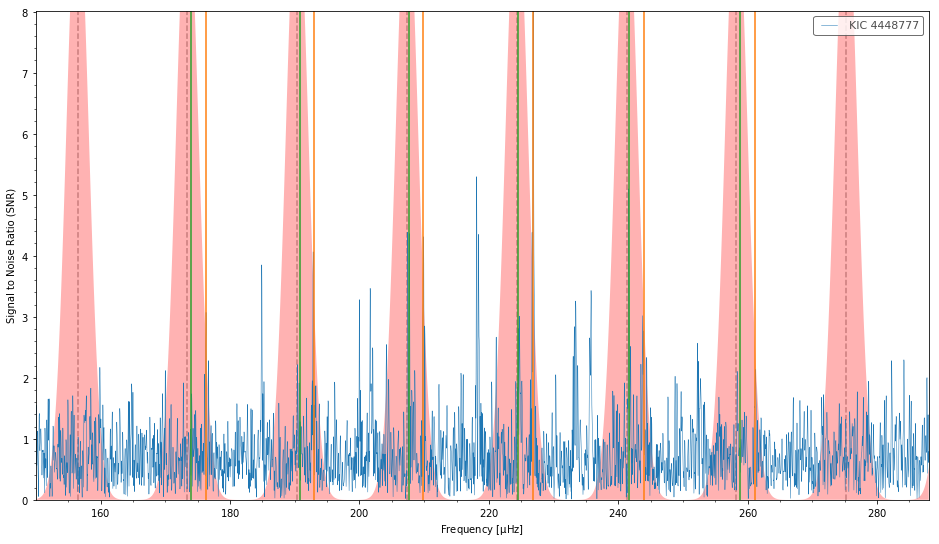

In [6]:
ge_vrard = pb.epsilon()
ep_vrard = ge_vrard(dnu, numax, teff)
print(f'Epsilon from Vrard : {ep_vrard}')


modeID = asymptotic_fit(np.array(p.frequency), np.array(p.power), numax, dnu, ep_vrard)

ge_vrard.plot(dnu, numax, teff, p)

for i in range(len(modeID)):
    if modeID['ell'][i] == 0:
        color = 'C1'
    else:
        color = 'C2'
    plt.axvline(modeID['nu_mu'][i], color = color)

In [7]:
ge_kde = pb.epsilon(method='kde')
ep_kde = ge_kde(dnu, numax, teff)
print(f'Epsilon from kde : {ep_kde}')
n = np.arange(8, 16, 1)
ge_kde.plot(dnu, numax, teff, p)

ValueError: The `method` parameter must be one of either`Vrard` or `KDE`

In [ ]:
x0 = [numax[0], dnu[0], 0.1, ep_kde[0], 0.03, 30, numax[0]*0.2, -1.0, 2.6]
asy = pb.mcmc(p.frequency.value, p.power.value, x0)
samples = asy(x0)

In [ ]:
print(np.mean(samples, axis=0))
print(np.std(samples, axis=0))

In [ ]:
fig, ax = plt.subplots(figsize=[16,9])
p.plot(ax=ax)
model = asy.model(np.mean(samples, axis=0)[:-1])
ax.plot(asy.f[asy.sel], model)

In [ ]:
# TODO Add in code to peak bag all of the modes somehow!